# Figures in software paper.

This notebook produce the maps in in Fig. 1 in the meta paper$^1$. This is to give yet one more example of the use of the agrid code. 

---
1. At least similar figures, the actual paper is generated by a SCons script. This notebook might not be updated. 

In [1]:
%gui qt

In [2]:
import sys
sys.path.append('..')

from agrid.grid import Grid
from agrid.acc import download

km = 1000

ant = Grid(crs=3031, res = [10*km, 10*km], left = -3100*km, up=3100*km, right = 3100*km, down = -3100*km)

In [12]:
#Download datasets
from agrid.acc import download
bedmap_url = 'https://secure.antarctica.ac.uk/data/bedmap2/bedmap2_tiff.zip'
bedmap_path = '../data/bedmap2_tiff'
download(bedmap_url, bedmap_path + '.zip')

for shape_ending in ['.shp','.shx','.prj', '.dbf', '.qix']:
    GSFC_url = '''http://quantarctica.tpac.org.au/Quantarctica3/Glaciology/GSFC%20Drainage/GSFC_DrainageSystems'''
    GSFC_file = '../data/GSFC/GSFC_DrainageSystems'
    download(GSFC_url+ shape_ending, GSFC_file + shape_ending)

Content:  application/zip
File ../data/bedmap2_tiff.zip already exists.
Content:  application/octet-stream
File ../data/GSFC/GSFC_DrainageSystems.shp already exists.
Content:  application/octet-stream
File ../data/GSFC/GSFC_DrainageSystems.shx already exists.
Content:  application/octet-stream
File ../data/GSFC/GSFC_DrainageSystems.prj already exists.
Content:  application/octet-stream
File ../data/GSFC/GSFC_DrainageSystems.dbf already exists.
Content:  application/octet-stream
File ../data/GSFC/GSFC_DrainageSystems.qix already exists.


In [13]:
# Import raster files
for data_set, label in zip(['thickness', 'bed'], ['ICE', 'DEM']):
    ant.ds[label] = (('Y', 'X'), 
        ant.read_raster('%s/bedmap2_%s.tif' %(bedmap_path, data_set), 
            no_data = 32767.) )

For this vector set, the attribute value ('ID') is not a number but a string. `map_to_int` is default True and assigns a numerical value to each class. `return_map` returns dictionary of values. 

In [14]:
#Import polygons
GSFC_file = '../data/GSFC/GSFC_DrainageSystems'
drainage = ant.assign_shape(GSFC_file + '.shp','ID')
ant.ds['DRAINAGE'] = (('Y', 'X'), drainage)

We can select a few polygons to use as classifier: 

In [15]:
# Select a few polygons: 
ant.ds['SEL_ICE'] = ant.ds['ICE']*ant.ds['DRAINAGE'].isin(list(range(0, 53//2)))

In [16]:
# Make some 3D data
import numpy as np

ant.ds['RANDOM'] = (('Y', 'X', 'Z'), 
                np.random.rand(*ant.shape3))


We can do some calculations: 

In [18]:
print(int(ant.ds['SEL_ICE'].sum()*np.prod(ant.res)/km**3),'km3')

6995448 km3


In [20]:
ant.oblique_view('DEM', 
    save_name = 'oblique_ant.png',
    vmin= -2000, vmax=4000, 
    cmap='bone',
    distance=1300,
    azimuth=180,
    roll=-90)

! open oblique_ant.png

Saved to: drainage.pdf


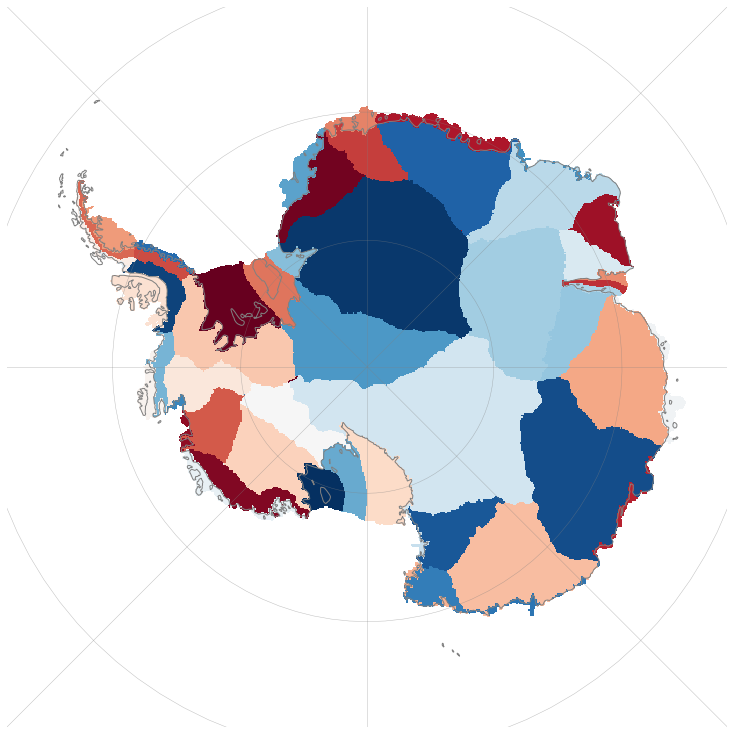

Saved to: selected.pdf


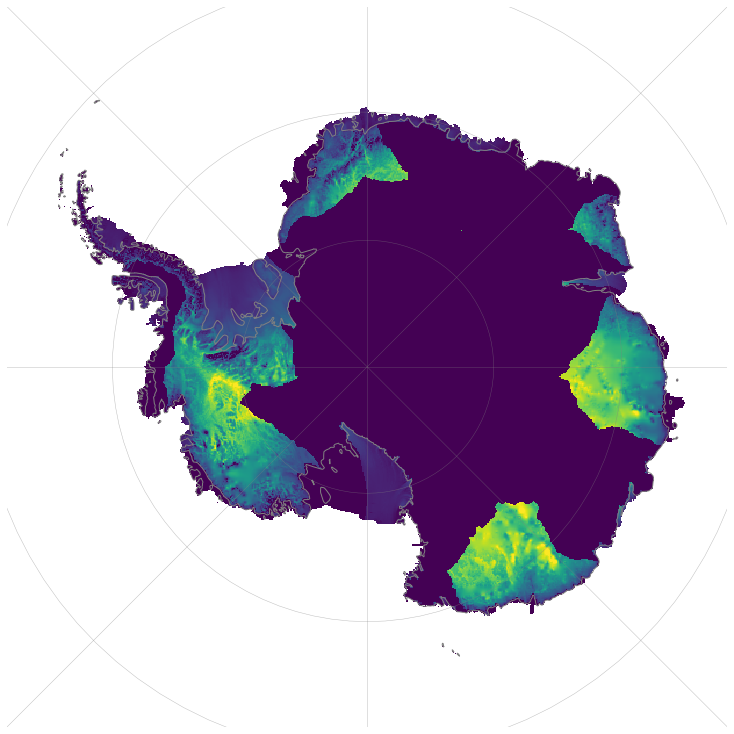

In [22]:
#Make maps
ant.map_grid('DRAINAGE', 
    cmap='RdBu', 
    save_name= 'drainage.pdf')

ant.map_grid('SEL_ICE', 
    cmap = 'viridis', 
    save_name = 'selected.pdf')

ant.oblique_view('DEM', 
    vmin= 0, vmax = 4200, 
    cmap = 'bone',
    azimuth = 180, roll = -90,
    save_name = 'oblique_view.png')

#Analyse. E.g:
vol = int(ant.ds['SEL_ICE'].sum()*np.prod(ant.res)/km**3)

In [ ]:
print(vol)

### New version

Example from manuscript (paths are not correct)

In [2]:
import sys
sys.path.append('..')

from agrid.grid import Grid
from agrid.acc import download

km = 1000

#Initiate a class object:
ant = Grid(res = [10*km, 10*km], 
		crs =3031, 
		depths = [0*km, 10*km, 20*km, 50*km, 100*km],
		left = -3100*km, 
		up 	= 3100*km, 
		right = 3100*km, 
		down = -3100*km)

#Download and import: 
bedmap_url = 'https://link/to/bedmap2_tiff.zip'
bedmap_path = 'data/bedmap2'
download(bedmap_url, bedmap_path + '.zip')

GSFC_url = 'http://link/to//GSFC_DrainageSystems'
GSFC_files = 'data/GSFC_DrainageSystems'
for shape_ext in ['.shp','.shx','.prj', '.dbf', '.qix']:
    download(GSFC_url + shape_ext, GSFC_files + shape_ext)

seis_url = 'http://link/to/AN1-S_depth_grd.tar.gz'
seis_path = 'data/an/'
download(seis_url, seis_path, bulk=True, 
        meta_dict = {'Model':'AN1-S', 'DOI': '10.1002/2014JB011332'})

# Import raster files
for data_set, label in zip(['thickness', 'bed'], ['ICE', 'DEM']):
    ant.ds[label] = (('Y', 'X'), 
        ant.read_raster('%s/bedmap2_%s.tif' %(bedmap_path, data_set), 
            no_data = 32767.) )

#Import polygons
ant.ds['DRAINAGE'] = (('Y', 'X'), ant.assign_shape(GSFC_file + '.shp','ID'))

#Import grid files to 3D data array. 
ant.ds['AN1-S'] = (('Y', 'X', 'Z'), ant.read_grid('../local/an/', bulk=True))

ConnectionError: HTTPSConnectionPool(host='link', port=443): Max retries exceeded with url: /to/bedmap2_tiff.zip (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x112d125c0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))